In [1]:
import os
import pickle
import numpy as np
import torch
import librosa
import re
import matplotlib.pyplot as plt
from CLAP import CLAP
from regCAV import RegCAVTrainer
from fs_lmdb import LMDBFootstepDataset

/home/jed/miniconda3/envs/attr_comp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
db_path = 'footsteps_full'
clap = CLAP()
cav = RegCAVTrainer(clap)

/home/jed/miniconda3/envs/attr_comp/lib/python3.10/site-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4322.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Load our best checkpoint in the paper.
The checkpoint is already downloaded
Load Checkpoint...
logit_scale_a 	 Loaded
logit_scale_t 	 Loaded
audio_branch.spectrogram_extractor.stft.conv_real.weight 	 Loaded
audio_branch.spectrogram_extractor.stft.conv_imag.weight 	 Loaded
audio_branch.logmel_extractor.melW 	 Loaded
audio_branch.bn0.weight 	 Loaded
audio_branch.bn0.bias 	 Loaded
audio_branch.patch_embed.proj.weight 	 Loaded
audio_branch.patch_embed.proj.bias 	 Loaded
audio_branch.patch_embed.norm.weight 	 Loaded
audio_branch.patch_embed.norm.bias 	 Loaded
audio_branch.layers.0.blocks.0.norm1.weight 	 Loaded
audio_branch.layers.0.blocks.0.norm1.bias 	 Loaded
audio_branch.layers.0.blocks.0.attn.relative_position_bias_table 	 Loaded
audio_branch.layers.0.blocks.0.attn.qkv.weight 	 Loaded
audio_branch.layers.0.blocks.0.attn.qkv.bias 	 Loaded
audio_branch.layers.0.blocks.0.attn.proj.weight 	 Loaded
audio_branch.layers.0.blocks.0.attn.proj.bias 	 Loaded
audio_branch.layers.0.blocks.0.norm2.we

In [13]:
embeddings, grassiness = cav.load_continuous_data_from_lmdb(db_path, "grass")
print(embeddings.shape)
print(speeds.shape)

✓ Loaded 2401 samples for attribute 'grass'
Grass range: 0.00 to 1.00
Grass distribution:
  grass=0.00: 343 samples
  grass=0.17: 343 samples
  grass=0.33: 343 samples
  grass=0.50: 343 samples
  grass=0.67: 343 samples
  grass=0.83: 343 samples
  grass=1.00: 343 samples
(2401, 512)
(2401,)


Training set: 1920 samples
Test set: 481 samples
Grass range (train): 0.00 to 1.00
Grass range (test): 0.00 to 1.00
Training linear regression...


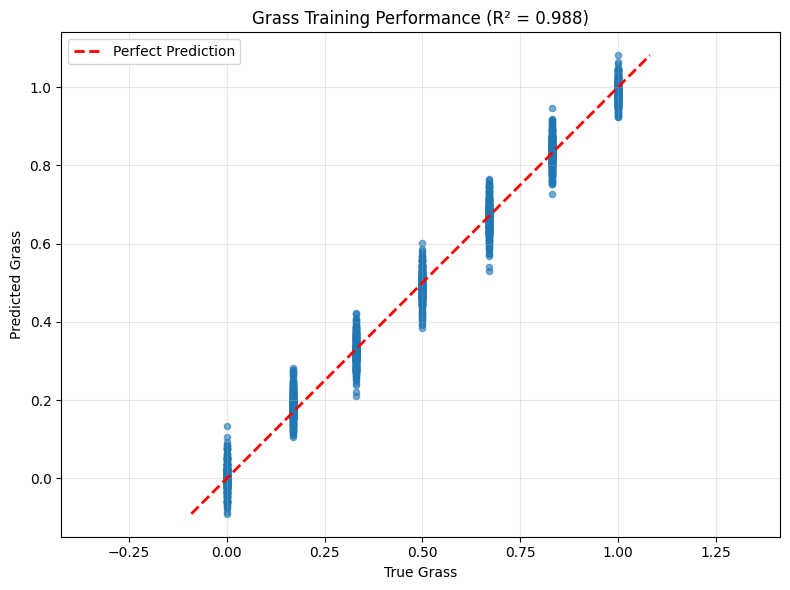

Training R²: 0.988
Test R²: 0.982
Training RMSE: 0.036
Test RMSE: 0.045
RCV shape: (512,)


{'attribute_name': 'grass',
 'train_r2': 0.9882077258011385,
 'test_r2': 0.9822427681543243,
 'train_rmse': 0.03591842302436051,
 'test_rmse': 0.04545445135909579,
 'train_mae': 0.028109137384220953,
 'test_mae': 0.03638590385165383,
 'rcv_magnitude': 0.92672014,
 'rcv_shape': (512,),
 'intercept': 0.50088537,
 'n_train_samples': 1920,
 'n_test_samples': 481}

In [14]:
cav.train_rcv(embeddings, grassiness)